In [1]:
"""x1...xn - F(x)
Nn/n -> ksi
Tn = n(1 - F(X_Nn ^ Nn))
Nn - bi-(2, 1/n)
F(x) = 1/(1+exp(-x))"""
""

''

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [23]:
n = 500


In [4]:
def F(x):
    return 1/(1+np.exp(-x))

In [5]:
def get_new_x():
    y = np.random.random()
    return -np.log(1/y-1)

In [6]:
def get_sample(length = 1):
    sample = []
    for i in xrange(length):
        sample.append(get_new_x())
    return sample

In [7]:
def make_Tn():
    Tn = []
    for i in xrange(n):
        N_n = np.random.negative_binomial(2, (1.0/(i+1)))
        if N_n < 50000:
            if N_n > 0:
                maximal = max(get_sample(length = N_n))
                Tn.append((i+1)*(1-F(maximal)))
            else:                
                Tn.append(0)
        else:
            print "ALARM", i, N_n
            break
    return Tn

In [8]:
sample = get_sample(n)
df = pd.DataFrame(sample)

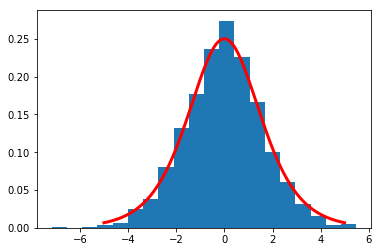

In [9]:
plt.hist(df, 20, normed=1)
t = np.arange(-5.0, 5.0, 0.01)
s = np.exp(t)/(np.exp(t)+1)**2
p = plt.plot(t, s, lw=3, c = "red")
plt.show()

/home/michael/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/michael/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


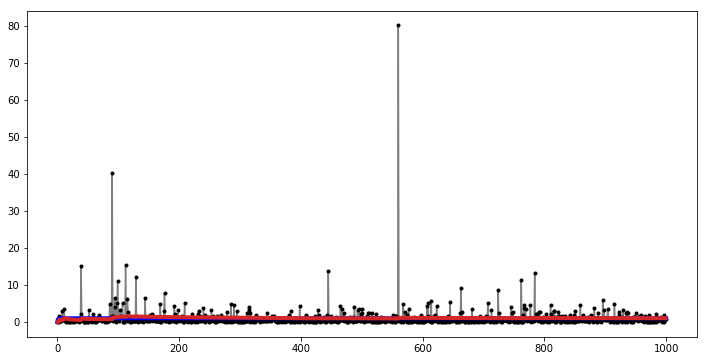

In [10]:
Tn = make_Tn()
plt.figure(figsize=(12,6))
p1 = plt.plot(Tn, c = "tab:grey");
p1 = plt.plot(Tn, c = "black", marker='.', ls='', lw = 0.5)

seq = []
for i in xrange(len(Tn)):
    seq.append(np.mean(Tn[0:i]))

t1 = np.arange(0.0, n, 0.1)
s1 = 1-1/(t1+1)**2 #2/(t1+1)**3#
p1 = plt.plot(t1, s1, lw=4, c = "blue")
p1 = plt.plot(seq, c = "tab:red", lw = 4)

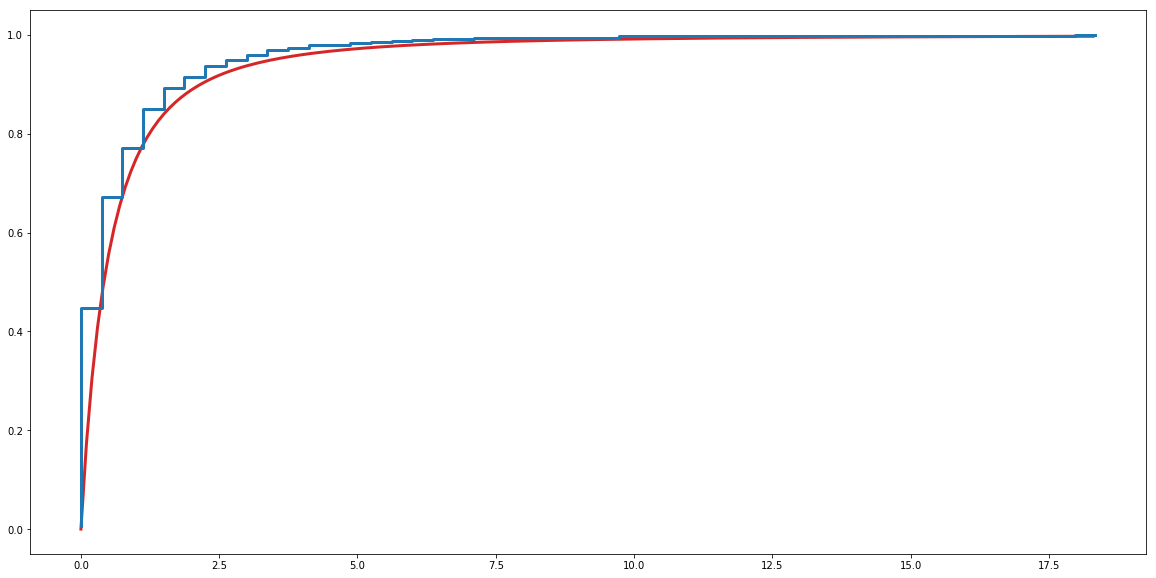

In [24]:
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt
Tn = make_Tn()
plt.figure(figsize=(20,10))


sample = Tn
ecdf = sm.distributions.ECDF(sample)

t1 = np.arange(-0.0, max(sample), 0.1)
s1 = 1-1/(t1+1)**2 #2/(t1+1)**3#
p1 = plt.plot(t1, s1, c= "tab:red", lw=3)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y, c="tab:blue", lw=3)
plt.show()